In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import csv
import matplotlib.pyplot as plt

In [4]:
import math
import numpy as np

In [5]:
from scipy import stats

import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [6]:
df_Casp = pd.read_csv("Casp8.txt",sep='\t');

/home/tjyacoub/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def unique(a, b):
    return list(set(a) != set(b))
def intersect(a, b):
    return list(set(a) & set(b))
def union(a, b):
    return list(set(a) | set(b))

In [8]:
def df_to_names(df):
    
    name_dict = {}
        
    for i in range(1,len(df.columns)):
        name = df.columns[i][:-2]
        if name in name_dict:
            name_dict[name].append(i)
        else:
            name_dict[name] = [i]
            
    return name_dict

In [20]:
def df_to_knock(df):
    
    knock_dict = {}
        
    for i in range(1,len(df.columns)):
        name = df.columns[i].split('.')[0]
        if name in knock_dict:
            knock_dict[name].append(i)
        else:
            knock_dict[name] = [i]
            
    return knock_dict

In [117]:
def col_to_cell(cols):
    cell_dict = {}
    for c in range(len(cols)):
        sp = cols[c].split('.')
        cell = sp[1] + '.' + sp[2]
        #cell = col.split('.')[1]
        if cell not in cell_dict:
            cell_dict[cell] = [c]
        else:
            cell_dict[cell].append(c)
    
    cell_dict = OrderedDict(sorted(cell_dict.items(), key=lambda t: t[0]))
    return cell_dict

def cell_to_color(cell_dict):
    color_dict = {}
    #colors = ['#000080','#40e0d0', '#3cb371', 'g', 'r', 'c', '#8a2be2', 'k', 'v', 'm']
    colors = ["#FF2FD1",
"#0FB18D",
"#F35F0E",
"#F5A6B0",
"#304EB1",
"#423642",
"#55C0F9",
"#844F0F",
"#6F1467",
"#0C4E2D",
"#D677FC",
"#9094F5",
"#004668",
"#B1BAE0",
"#F58B40"]
    
    for i, c in enumerate(cell_dict):
        #print i, c, colors[i]
        color_dict[c] = colors[i]

    return color_dict


In [105]:
import collections
from collections import OrderedDict

In [106]:
knock_dict = df_to_knock(df_Casp)

In [238]:
def PCA_groups(df):
    knock_dict = df_to_knock(df)
    #for name in knock_dict.keys()[0]:
    X_rs = []
    cell_dicts = []
    pcexps = []
    for name in knock_dict.keys()[:4]: 
        #print name
        
        Xm = df_Casp.ix[1:,knock_dict[name]]
        #print Xm.columns
        X = np.array(Xm).astype(float)
        for row in range(len(X)):
            X[row] = np.log(X[row]+1)
        X = X.transpose()
        
        n_components=20
        pca = PCA(n_components)
        X_r = pca.fit(X).transform(X)
        X_rs.append(X_r)
        
        plt.figure()
        PCx = 'PC1'
        PCxi = 0
        PCy = 'PC3'
        PCyi = 2
        
        print len(pca.explained_variance_ratio_)
        pca1 = pca.explained_variance_ratio_[PCxi]
        pca2 = pca.explained_variance_ratio_[PCyi]
        
        var = 0
        pcexp = []
        for i in range(n_components):
            var = pca.explained_variance_ratio_[i]
            pcexp.append(var)
        pcexps.append(pcexp)
        
        
        plt.axes(ylabel=PCy +'\n'+ (str(round(pca2*100,0))+'%'), xlabel=PCx+'\n'+(str(round(pca1*100,0))+'%'))
        
        cell_dict = col_to_cell(Xm.columns)
        cell_dicts.append(cell_dict)
        cell_colors = cell_to_color(cell_dict)
        for ci in cell_dict:
            #print ci
            ind = cell_dict[ci]
            plt.scatter(X_r[ind,PCxi], X_r[ind,PCyi], s=150, c=cell_colors[ci], label = ci)
        plt.plot()
        plt.legend(bbox_to_anchor=(1.3,0.5))
        plt.title(name)
        #print X.columns
    return X_rs, cell_dicts, pcexps
        

20
20
20
20


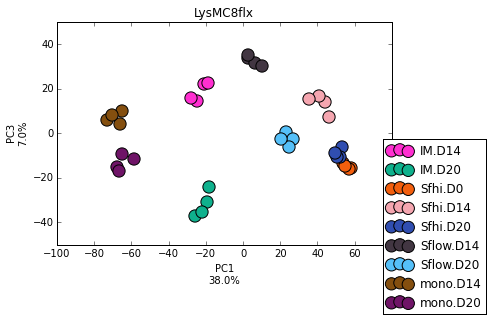

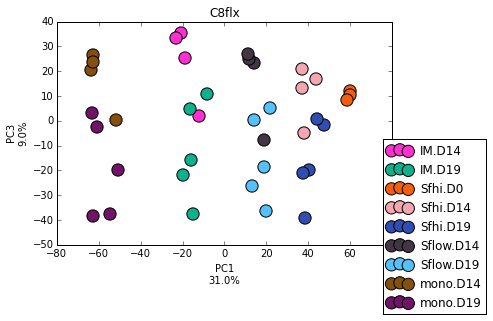

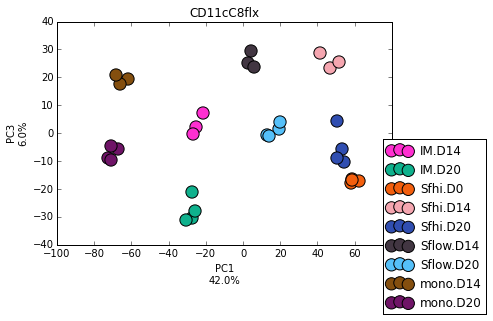

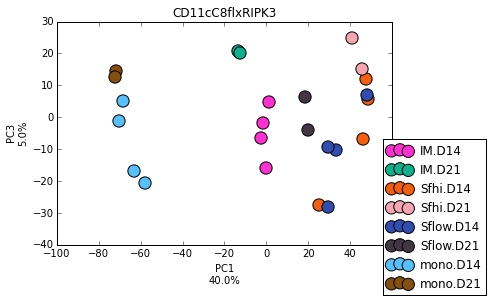

In [239]:
X_rs, cell_dicts, pcexps = PCA_groups(df_Casp)

In [193]:
pcexp = pcexps[0]

In [211]:
pcexp

[0.38359500794366036,
 0.18704096654323832,
 0.068110338867325398,
 0.039631952308686068,
 0.022060239128084178,
 0.017203068316116787,
 0.015922341233285255,
 0.014474017377115634,
 0.013700670850150132,
 0.013048601888762378,
 0.012909225686358926,
 0.011834839723127171,
 0.01153127923390028,
 0.011395075753568564,
 0.010921290678134106,
 0.010423486363109188,
 0.0098455103133223837,
 0.0095849316981871779,
 0.0094792656809129759,
 0.0092977689849048119]

In [186]:
tx = X_rs[0]

In [203]:
pc1

array([-24.98224469, -30.38136602,  14.32949807,  19.98545901,
         6.46596731,  -4.05834713,   7.86135886,  -9.81738438,
         5.59106971,  -6.4240556 ,  16.76443252,  30.63452739,
        -3.12560523, -16.19228879,   1.7563054 ,  12.45814697,
        -1.06721298,  -0.96519612,  -0.56084229,  -3.51331709])

In [209]:
mouse1 = tx[[0,1,2,3]]

In [217]:
for pc in range(len(mouse1.transpose())):
    avg = np.mean(mouse1.transpose()[pc])
    std = np.std(mouse1.transpose()[pc])
    print avg, std

-23.1858738958 3.61761089455
-29.4227068128 1.8385974361
18.6855115187 3.60829571773
17.9834972956 2.87025802428
4.57694644971 1.09918623881
1.54967261336 3.44544442015
4.71931225715 4.70346616329
-5.91111943685 2.40286463029
5.86891531264 3.64894988468
-1.60154092174 2.79367084846
9.60234923205 4.41528257377
0.620677468376 18.3989563796
-2.66956917688 11.9609307585
-3.20885790306 10.875626625
-3.11214229858 10.4139562313
-4.78529415144 10.9269475228
1.32541065583 8.31826223473
1.21615462183 6.86697500088
-0.251558804237 6.30626025175
1.66965024227 6.446288017


In [213]:
mouse1.transpose()

array([[-24.98224469, -21.00050737, -28.08515659, -18.67558693],
       [-30.38136602, -28.60438931, -31.79417918, -26.91089274],
       [ 14.32949807,  21.94645701,  15.92615977,  22.53993122],
       [ 19.98545901,  16.67246617,  21.31146219,  13.96460182],
       [  6.46596731,   3.92482576,   3.7658577 ,   4.15113503],
       [ -4.05834713,   1.93554062,   3.1000565 ,   5.22144047],
       [  7.86135886,   3.31426904,   9.98005123,  -2.27843009],
       [ -9.81738438,  -4.01811361,  -5.95949004,  -3.84948972],
       [  5.59106971,   6.62229163,  10.75469864,   0.50760127],
       [ -6.4240556 ,  -0.04763984,   0.35308868,  -0.28755692],
       [ 16.76443252,   4.81686439,   7.72178254,   9.10631748],
       [ 30.63452739,  -4.28467958,  -4.38458023, -19.4825577 ],
       [ -3.12560523,   6.83574075,   7.65085862, -22.03927085],
       [-16.19228879,   5.81309291,   9.1474612 , -11.60369693],
       [  1.7563054 ,   4.29981408,   2.57471986, -21.07940853],
       [ 12.45814697,  -7

In [212]:
for mouse in mouse1: 
    print mouse

[-24.98224469 -30.38136602  14.32949807  19.98545901   6.46596731
  -4.05834713   7.86135886  -9.81738438   5.59106971  -6.4240556
  16.76443252  30.63452739  -3.12560523 -16.19228879   1.7563054
  12.45814697  -1.06721298  -0.96519612  -0.56084229  -3.51331709]
[-21.00050737 -28.60438931  21.94645701  16.67246617   3.92482576
   1.93554062   3.31426904  -4.01811361   6.62229163  -0.04763984
   4.81686439  -4.28467958   6.83574075   5.81309291   4.29981408
  -7.78209189  -2.92918067  -6.11398466   8.26846391   8.92627991]
[-28.08515659 -31.79417918  15.92615977  21.31146219   3.7658577
   3.1000565    9.98005123  -5.95949004  10.75469864   0.35308868
   7.72178254  -4.38458023   7.65085862   9.1474612    2.57471986
 -17.81590991  15.39273765  12.4871866   -9.48923349  -5.86897508]
[-18.67558693 -26.91089274  22.53993122  13.96460182   4.15113503
   5.22144047  -2.27843009  -3.84948972   0.50760127  -0.28755692
   9.10631748 -19.4825577  -22.03927085 -11.60369693 -21.07940853
  -6.00132

In [202]:
tx

array([[ -2.49822447e+01,  -3.03813660e+01,   1.43294981e+01,
          1.99854590e+01,   6.46596731e+00,  -4.05834713e+00,
          7.86135886e+00,  -9.81738438e+00,   5.59106971e+00,
         -6.42405560e+00,   1.67644325e+01,   3.06345274e+01,
         -3.12560523e+00,  -1.61922888e+01,   1.75630540e+00,
          1.24581470e+01,  -1.06721298e+00,  -9.65196125e-01,
         -5.60842294e-01,  -3.51331709e+00],
       [ -2.10005074e+01,  -2.86043893e+01,   2.19464570e+01,
          1.66724662e+01,   3.92482576e+00,   1.93554062e+00,
          3.31426904e+00,  -4.01811361e+00,   6.62229163e+00,
         -4.76398439e-02,   4.81686439e+00,  -4.28467958e+00,
          6.83574075e+00,   5.81309291e+00,   4.29981408e+00,
         -7.78209189e+00,  -2.92918067e+00,  -6.11398466e+00,
          8.26846391e+00,   8.92627991e+00],
       [ -2.80851566e+01,  -3.17941792e+01,   1.59261598e+01,
          2.13114622e+01,   3.76585770e+00,   3.10005650e+00,
          9.98005123e+00,  -5.95949004e+00

In [205]:
pc1 = tx.transpose()[0]

In [206]:
pc1

array([-24.98224469, -21.00050737, -28.08515659, -18.67558693,
       -25.78596155, -18.39140695, -19.43945859, -22.32837172,
        53.94925925,  57.84857684,  57.19245291,  54.65130814,
        43.87733271,  40.65110421,  35.42852953,  46.44204951,
        53.05739296,  52.03501091,  50.45953852,  49.26961666,
         2.85450271,   6.27018295,   2.79664718,  10.222857  ,
        22.98926772,  26.75818933,  24.63327838,  20.28045475,
       -66.23375844, -64.97294647, -73.19149988, -70.58748544,
       -65.3514831 , -58.39233238, -67.55823864, -66.69111343])

In [207]:
tdict = cell_dicts[0]

In [208]:
tdict

OrderedDict([('IM.D14', [0, 1, 2, 3]),
             ('IM.D20', [4, 5, 6, 7]),
             ('Sfhi.D0', [8, 9, 10, 11]),
             ('Sfhi.D14', [12, 13, 14, 15]),
             ('Sfhi.D20', [16, 17, 18, 19]),
             ('Sflow.D14', [20, 21, 22, 23]),
             ('Sflow.D20', [24, 25, 26, 27]),
             ('mono.D14', [28, 29, 30, 31]),
             ('mono.D20', [32, 33, 34, 35])])

In [182]:
tdict = cell_dicts[0]
for name in tdict:
    ind = tdict[name]
    

OrderedDict([('IM.D14', [0, 1, 2, 3]),
             ('IM.D20', [4, 5, 6, 7]),
             ('Sfhi.D0', [8, 9, 10, 11]),
             ('Sfhi.D14', [12, 13, 14, 15]),
             ('Sfhi.D20', [16, 17, 18, 19]),
             ('Sflow.D14', [20, 21, 22, 23]),
             ('Sflow.D20', [24, 25, 26, 27]),
             ('mono.D14', [28, 29, 30, 31]),
             ('mono.D20', [32, 33, 34, 35])])

In [156]:
X_r

NameError: name 'X_r' is not defined

In [ ]:
PCA_groups(df_Casp, knock_dict)

In [ ]:
X = df_Casp.ix[1:,1:].transpose()

In [ ]:
X = df_Casp.ix[1:,1:]

In [ ]:
X.columns[:45]

In [ ]:
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

In [ ]:
X_r

In [ ]:
for c, i, name in zip(colors, )

In [ ]:
name_dict = df_to_names(df_Casp)

In [ ]:
test_names = [name_dict.keys()[0], name_dict.keys()[1]]
test_names2 = [name_dict.keys()[2], name_dict.keys()[3]]

In [ ]:
name_dict

In [ ]:
len(name_dict)

In [ ]:
pairs = [[[names[i], names[j]] for i in range(n_names) if names[i]!=names[j] and '14' in names[i] and '14' in names[j]] for j in range(n_names)]

In [ ]:
pairs

In [ ]:
names = name_dict.keys()
n_names = len(names)

In [ ]:
### Create new temp dataframe with cols ['samp1a','samp1b','samp2a','samp2b','gene']
### Add cols for logfc, pval
def names_to_df(names):
       
    # For first name    
    #print names
    indices = list(name_dict[names[0]])
    indices.insert(0,0)
    df_temp1 = df_Casp.ix[:,indices]
    
    # For second name
    indices = list(name_dict[names[1]])
    indices.insert(0,0)
    df_temp2 = df_Casp.ix[:,indices]
    
    dft = pd.merge(df_temp1, df_temp2, how='outer', on='Symbol')
    
    print "check"
    dft = dft.ix[2:]
    
    
    return dft
    #dft = merge(dft)

In [ ]:
### Create new temp dataframe with cols ['samp1a','samp1b','samp2a','samp2b','gene']
### Add cols for logfc, pval
def names_to_df(names):
       
    # For first name    
    #print names
    indices = name_dict[names[0]]
    y1 = [0 for x in range(len(indices))]
    df_temp1 = df_Casp.ix[1:,indices].transpose()
    #df_temp1 = df_Casp.ix[:,indices]#.transpose()
    #df_temp1 = df_temp1.ix[1:].transpose()
    
    # For second name
    indices = name_dict[names[1]]
    y2 = [1 for x in range(len(indices))]
    df_temp2 = df_Casp.ix[1:,indices].transpose()
    #df_temp2 = df_temp2.ix[1:].transpose()
    
    #dft = pd.merge(df_temp1, df_temp2, how='outer', on='Symbol')
    X = pd.concat([df_temp1, df_temp2])
    #dft = dft.ix[1:]
    for i in range(1,2):
        t = np.array(X[i])
        print t.average()
        print i,t, type(X[i]), type(t.mean())
        X[i] = X[i].apply(lambda x: (x - t.mean())/ (t.max() - t.min()))
    #new_data.append(dft.transpose())
    
    y = y1 + y2
    
    return X, y
    #dft = merge(dft)

In [ ]:
X, y = names_to_df(pairs[2][2])

In [ ]:
X[2]

In [ ]:
y

In [ ]:
dft.transpose()

In [ ]:
for 

In [ ]:
pairs

In [ ]:
for pair in pairs: 
    #print pair
    print len(pair)

In [ ]:
%%capture
stat_dict = combos2(name_dict);

In [ ]:
for name in stat_dict:
    if len(stat_dict[name]) > 0:
        print name, stat_dict[name], '\n'

In [ ]:
names = ["FC up", "FC down", "PV up", "PV down"]
for i in range(4):
    print names[i]
    print x[i]
    #print genes_shared_ct[i] #".2f"% genes_shared_ct[i][1] 

In [ ]:
plt.plot([0.6, 0.2, 0.6, 0.5])

In [ ]:
dft = dft[pd.notnull(dft).all(axis=1)]

In [ ]:
ncols = len(dft.columns)
gene_names = dft.ix[:,0]
for i in range(1, ncols, 4):   #ncols):
    sample1_name = dft.columns[i]
    sample_list = []
    sample1 = dft.ix[:,i]
    for j in range(1, ncols):
        
        sample2_name = dft.columns[j]
        
        sample2 = dft.ix[:,j]
        #print sample1[0], sample2[0]
        logfc = np.log(sample2/sample1)
        logfc = logfc[logfc < 100]
        upreg = len(logfc[logfc > 1.4])
        downreg = len(logfc[logfc < -1.4])
        #print sample1_name, sample2_name, upreg, downreg
        dist = upreg + downreg
        regratio = upreg - downreg
        sample_list.append([sample2_name, dist, upreg, downreg])
        
    print sample1_name
    for n in sample_list:
        print n
    #print sample_list
#        print sample1/sample2

In [ ]:
def make_tree(dfs):
    ndf = len(dfs)
    mat
    for df1_ind in range(ndf):
        for df2_ind in range(df1_ind+1,ndf):
            merged_df = pd.merge(dfs[df1_ind], dfs[df2_ind], how = 'outer', on='gene')
            
            #merged_df['ratio'] = float(merged_df[[1]]) #sum(float(merged_df[[1,2,3,4]]))
            #for gene_ind in range(len(merged_df)):
        ### GET ratios
                
        ### GET SIMILARITY
        ### [ YN [1, 0.4, 0.8. 0.7],
        ###   ON [0.6, 1, 0.9, 0.2],
        ###   YF [0.4, 0.3, 1, 0.6],
        ###   OF [0.3, 0.9, 0.1, 1]]
        
        ### TREE FIGURE
        ###      YF (2)
        ###     /
        ###  YN(1)- ON(3)- OF(4)
        
        ###  [[1,2],[1,3],[3,4]]
        
        ### START WITH
        ### [[1,2],[1,3],[1,4]]
        ### [1-2] 0.3
        ### [1-3] 0.8
        ### [1-4] 0.5
        ### Then go to 2
        ### [2-1] 0.3 (ok)
        ### [2-3] 0.9 (>[1-3], change)
                    ### [[1,2],[2,3],[1,4]]
        ### [2-4] 0.2 (<[1-4], no change)
        ### On to 3...
        ### [3-1] 0.3 (ok)
        ### [3-2] 0.1 (<[1-3], no change)
        ### [3-4] 0.9 (>[1-4], change
                    ### [[1,2],[1,3],[3,4]])
        
        ### [1-3] ok
        sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
        for i in range(ndf):
            ## Initialize tree starting with i
            tree = []
            for j in range(ndf):
                tree[j] = [i,j]
                #similarity_matrix sim
                
                
            for j in range(ndf):
                sim_ij = sim[i,j]
                for k in range(ndf):
                    sim_ik = sim[i,k]
                    if sim_ik > sim_ij:
                        tree[j] = [i,k]
                    
                
                
    
    #return merged_df
        
            
make_tree(dfs);

In [ ]:
import random
ndf = 4
sim = [[random.random() for i in range(ndf)] for j in range(ndf)]

In [ ]:
sim[2][3]

In [ ]:
def make_tree2():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    nodes = [i for i in range(ndf)]
    for i in range(ndf):
        #print "begin", i
            ## Initialize tree starting with i
        tree = []# [0 for x in range(ndf-1)]
        
        j_nodes = [z for z in range(ndf)]
        j_nodes.remove(i)
        for j in j_nodes: 
            tree.append([i,j])
                #similarity_matrix sim
                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            print sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree2()

In [ ]:
def make_tree_rand():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_rand()

In [ ]:
def make_tree_easy():
    ndf = 10
    sim = [[random.random() for i in range(ndf)] for j in range(ndf)]
    seq = [i for i in range(ndf)]

    nodes = [random.choice() for i in range(ndf)]
    n_iter = 10
    
    ### Initialize tree
    tree = []# [0 for x in range(ndf-1)]
    
    j_nodes = [z for z in range(ndf)]
    j_nodes.remove(i)
    for j in j_nodes: 
        tree.append([i,j])
                #similarity_matrix sim
    for i in range(n_iter):
        #print "begin", i
            ## Initialize tree starting with i

                
        n_iters = 1
        for iteration in range(n_iters):
            
            #print tree
        #print "j_nodes",j_nodes
            for j in j_nodes:
            #print tree
                sim_ij = sim[i][j]
            
                k_nodes = [z for z in range(ndf)]
                k_nodes.remove(j)
                k_nodes.remove(i)
                #print "k_nodes", k_nodes
                for k in k_nodes:
                #print "j = ", j, "k=", k
                    sim_ik = sim[i][k]
                    sim_jk = sim[j][k]
                    if sim_ik > sim_jk:
                        #print j,k, "> ", i, k
                        tree[k-1] = [j,k]
                        #print tree
            #print "end iteration", iteration, tree
            #for i in range(len(tree)):
            error = sum([sim[ii][jj] for ii,jj in tree])
        printsorted(tree)
make_tree_easy()

In [ ]:
tree = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5]]

In [ ]:
def printsorted(tree):
    tree.sort()
    tree_dict = {}
    for i in range(len(tree)):
        if tree[i][0] not in tree_dict:
            tree_dict[tree[i][0]] = [tree[i][1]]
        else:
            tree_dict[tree[i][0]].append(tree[i][1])
        
    print tree_dict
            